In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scikitplot.cluster import plot_elbow_curve

#for not showing warnings
import warnings
warnings.filterwarnings('ignore')

#data manipulation and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for modelling and evaluation
import sklearn
from sklearn.datasets import make_regression

from math import sqrt
import scikitplot as skplt #in case of error run <<!pip install scikit-plot>> and run the code again
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data=pd.read_excel("sample_final.xlsx")

In [3]:
data.head()

,Random,ad_instance_id,segment_id_x,place_id,user_action_id,action_time,screen_height,screen_width,segment_id_y,User_ID,mac_address
0,0.743537,2021,6,9,0,0,667,375,11,223481,1
1,0.351489,1108,6,47,-1,1,667,375,4,795536,1
2,0.358623,2747,6,27,0,0,640,360,5,938974,0
3,0.383300,2237,6,77,0,0,640,360,11,111971,0
4,0.363150,2306,14,46,0,0,640,360,4,421991,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299999 entries, 0 to 299998
Data columns (total 11 columns):
Random            299999 non-null float64
ad_instance_id    299999 non-null int64
segment_id_x      299999 non-null int64
place_id          299999 non-null int64
user_action_id    299999 non-null int64
action_time       299999 non-null int64
screen_height     299999 non-null int64
screen_width      299999 non-null int64
segment_id_y      299999 non-null int64
User_ID           299999 non-null int64
mac_address       299999 non-null int64
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


In [5]:
data=data.drop("Random",axis=1)

In [6]:
data.user_action_id=np.where(data.user_action_id==1,1,0)

In [7]:
#checking number of duplicates, missing values and columns with a single value
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 94681
Missing values: 0
Single valued columns: Index([], dtype='object')


In [8]:
data.user_action_id.value_counts(normalize=True).mul(100).rename("User Action")

0    94.118314
1     5.881686
Name: User Action, dtype: float64

In [9]:
data.nunique()

ad_instance_id      544
segment_id_x         19
place_id            202
user_action_id        2
action_time           2
screen_height       207
screen_width        143
segment_id_y         15
User_ID           46614
mac_address           3
dtype: int64

In [10]:
data=pd.pivot_table(data=data,index="User_ID",columns="ad_instance_id",values="user_action_id",aggfunc=sum, fill_value=0)

In [11]:
data.head()

ad_instance_id,1108,1109,1901,1942,1950,1965,1982,2001,2021,2028,...,2911,2914,2915,2919,2920,2922,2924,2928,2941,2944
User_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data.describe()

ad_instance_id,1108,1109,1901,1942,1950,1965,1982,2001,2021,2028,...,2911,2914,2915,2919,2920,2922,2924,2928,2941,2944
count,46614.000000,46614.000000,46614.000000,46614.000000,46614.000000,46614.000000,46614.000000,46614.0,46614.000000,46614.000000,...,46614.000000,46614.0,46614.000000,46614.0,46614.000000,46614.000000,46614.000000,46614.0,46614.0,46614.0
mean,0.013623,0.012829,0.005942,0.020573,0.009890,0.001588,0.004269,0.0,0.010297,0.000086,...,0.000021,0.0,0.000021,0.0,0.000343,0.000386,0.000429,0.0,0.0,0.0
std,0.177726,0.202018,0.085826,0.703529,0.116665,0.042924,0.067781,0.0,0.125917,0.009263,...,0.004632,0.0,0.004632,0.0,0.018524,0.020710,0.023614,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
max,21.000000,15.000000,5.000000,147.000000,7.000000,4.000000,2.000000,0.0,13.000000,1.000000,...,1.000000,0.0,1.000000,0.0,1.000000,2.000000,3.000000,0.0,0.0,0.0


In [13]:
scaler=MinMaxScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

# K-Means Clustering

In [14]:
data_final=data_scaled.iloc[:,1:]

In [15]:
data_final.head()

ad_instance_id,1109,1901,1942,1950,1965,1982,2001,2021,2028,2042,...,2911,2914,2915,2919,2920,2922,2924,2928,2941,2944
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
model1_cluster = KMeans(5,random_state=42)

In [17]:
model1_cluster.fit_predict(data_final)

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
#let's get values of cluster centers
model1_cluster.cluster_centers_

array([[ 9.68992248e-03,  1.39534884e-02,  1.22607182e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.00900472e-04,  1.14723581e-03,  1.10585816e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.22222222e-02,  8.67361738e-19,  3.52733686e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.25260652e-19, -4.11996826e-18,  7.19864665e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [19]:
#let's see Sum of squared distances of samples to their closest cluster center. The smaller the number the better
model1_cluster.inertia_

1979.7527567705056

# Elbow Method

There is a method to choose optimal value of k (number of clusters). The method is called elbow method.

In [20]:

sse={}
for k in range(1,11):
    cluster_wine=KMeans(k,random_state=42)
    cluster_wine.fit_predict(data_final)
    sse[k] = cluster_wine.inertia_ #Sum of squared distances of samples to their closest cluster center, 
                                        #other measures of distances can also be taken
        
#lets see what sse contains
print(sse)

{1: 2187.344914723173, 2: 2112.6401337443826, 3: 2092.6924823332924, 4: 2028.6411758905608, 5: 1979.7527567705056, 6: 1997.8270114108877, 7: 1958.5602209603258, 8: 1949.7420519755487, 9: 1928.5912218148128, 10: 1900.2624492315913}


Now let's just use plot_elbow_curve() function to plot elbow curve!

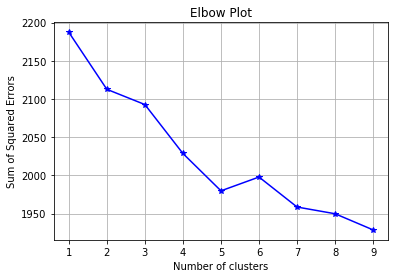

In [21]:
plot_elbow_curve(KMeans(random_state=42),data_final,cluster_ranges=range(1,10),show_cluster_time=False)
plt.show()

# Final Model based on the optimal K

In [22]:
#let's add cluster labels to our original data
cluster_final=KMeans(5,random_state=42)
data_final["cluster_final"]=cluster_final.fit_predict(data_final)

In [23]:
data_final.head()

ad_instance_id,1109,1901,1942,1950,1965,1982,2001,2021,2028,2042,...,2914,2915,2919,2920,2922,2924,2928,2941,2944,cluster_final
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [24]:
# quickly count the number of customers in each cluster
data_final.cluster_final.value_counts()

1    46198
4      189
0      172
3       54
2        1
Name: cluster_final, dtype: int64